# Titanic - Supervised Classification
### Ejercicio 3.2

Pondremos en práctica los conocimientos aprendidos hasta ahora desarrollando un modelo predictivo a través de sus diferentes fases. Tomaremos el dataset del Titanic pero, en este caso, los datos a trabajar se encuentran en formato json.

## 1.- Conocimiento de los datos
El dataset está formado por los siguientes campos:
* **Passenger Class**: Clase de billete comprado: primera, segunda o tercera clase  
* **Name**: Nombre del pasajero  
* **Sex**: Sexo del pasajero  
* **Age**: Edad del pasajero  
* **No of Siblings or Spouses on Board**: Número de hermanos o cónyugues a bordo  
* **No of Parents or Children on Board**: Número de padres o hijos a bordo  
* **Ticket Number**: Número de ticket  
* **Passanger Fare**: Tarifa pagada  
* **Cabin**: Cabina  
* **Port of Embarkation**: Puerto de embarque  
* **Life Boat**: Bote salvavidas  
* **Survived**: Yes=Sobrevivió | No=No sobrevivió  

[**Objetivo**] Hay algún patrón en la supervivencia? Se podría haber predecido?


## 2.- Librerías y parámetros
Importar librerías necesarias

In [98]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.feature_selection import RFE

import pickle

In [5]:
PATH = 'data/'
FILE_NAME = '3_2_titanic.json'

## 3.- Carga de datos
Cargar los datos del fichero en un dataframe

In [126]:
# Hacemos uso de la función read_json() que incorpora la librería de Pandas para cargar los datos en un dataframe.
df = pd.read_json(PATH+FILE_NAME)

In [7]:
# Comprobamos que los datos han sido cargados correctammente a través de la función head().
# Esta devuelve, por defecto, los 5 primeros registros del dataframe.
# Si le pasamos un número entero como argumento nos devolverá los primeros n registros.
# Observamos que aparecen ya en estas primeras 5 líneas valores faltantes para la columna "Life Boat".
# Esto tiene sentido en tanto en cuanto entendemos que mantienen una relación directa con la supervivencia del pasajero.
df.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0,0,24160,211.3,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1,2,113781,151.6,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1,2,113781,151.6,C22 C26,Southampton,None,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1,2,113781,151.6,C22 C26,Southampton,None,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1,2,113781,151.6,C22 C26,Southampton,None,No


In [8]:
# También podemos obtener los últimos valores del datafram con la función tail().
# Esta devuelve, por defecto, los 5 últimos registros del dataframe.
# Si le pasamos un número entero como argumento nos devolverá los últimos n registros.
# Observamos que la fila 1305 tiene un valor faltante para la columna "Age". 
df.tail()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
1304,Third,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.5,None,Cherbourg,None,No
1305,Third,"Zabour, Miss. Thaminen",Female,NaN,1,0,2665,14.5,None,Cherbourg,None,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.2,None,Cherbourg,None,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0,0,0,2670,7.2,None,Cherbourg,None,No
1308,Third,"Zimmerman, Mr. Leo",Male,29.0,0,0,315082,7.9,None,Southampton,None,No


## 4.- Limpieza
Limpiar datos. Hay nulos?

[**EX1**] Info general

In [5]:
# La función info nos aporta información compacta acerca de la estructura del objeto que acabamos de generar.
# Concretamente, nos ofrece la dimensionalidad del dataframe: 1309 filas y 8 columnas.
# Además, la misma función aporta información sobre:
    # La memoria usada.
    # El tipo de dato y el conteo de observaciones para cada uno de los atributos.
# En este caso vemos, por ejemplo, que la edad y la tarifa son valores de tipo decimal.
# También vemos que se está detectando la presencia de valores nulos.
# Pandas representa los valores nulos como "NaN" (Not a Number) o "None".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Life Boat                           486 non-null    object 
 11  Survived                            1309 no

[**EX2**] Nulos por columna?

In [6]:
# Vemos el número de valores nulos por columna 
df.isnull().sum()

Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
dtype: int64

In [20]:
# La columna "Cabin" contiene demasiados valores faltantes, por lo que la eliminamos.
df = df.drop(columns=["Cabin"])

[**EX3**] Hay registros duplicados?

In [7]:
# Asimismo, también conviene comprobar que no haya registros duplicados en nuestro dataframe.
# Esto se puede chequear rápidamente con la función duplicated().
# Esta devuelve una serie booleana que indica el valor verdadero para aquellas filas duplicadas.
# Acompañada de la función any (retorna verdadero en caso de encontrar algún elemento verdadero).
# Como resultando, constatamos que no tenemos filas enteras duplicadas.
df.duplicated().any()

False

[**EX4**] Cuantos valores hay de cada columna?

In [8]:
# Si usamos la función nunique podemos conocer el número total de observaciones únicas para cada uno de los atributos.
df.nunique()

Passenger Class                          3
Name                                  1306
Sex                                      2
Age                                     97
No of Siblings or Spouses on Board       7
No of Parents or Children on Board       8
Ticket Number                          929
Passenger Fare                         210
Cabin                                  186
Port of Embarkation                      3
Life Boat                               27
Survived                                 2
dtype: int64

[**EX5**] Qué valores hay para cada columna categórica? Se puede rellenar algún nulo?

In [21]:
# También podemos obtener los diferentes valores para columnas concretas:
df["Port of Embarkation"].unique()
# Observamos que entre los valores distintos del campo "Port of Embarkation" hay strings que no contienen nada.
# Vemos como, contrariamente a la información que obteníamos en la función info(), hay valores suscepribles de ser considerados nulos.

array(['Southampton', 'Cherbourg', None, 'Queenstown'], dtype=object)

In [23]:
df["Passenger Class"].value_counts()

Third     709
First     323
Second    277
Name: Passenger Class, dtype: int64

In [22]:
# Es importante completar los valores faltantes, porque algunos algoritmos de aprendizaje automático
# no pueden aceptarlos. Existen varias formas de completar los valores faltantes como, por ejemplo, usando:
# la media, la mediana, el valor inmediatamente anterior, entre otros.
# En nuestro caso rellenaremos los valores faltantes para "Age" y "Passenger Fare" con la media para dichas columnas.
# El resto de valores desconocidos serán transformados en el valor más común para la columna.
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Passenger Fare"].fillna(df["Passenger Fare"].mean(), inplace=True)
df["Port of Embarkation"].fillna(df["Port of Embarkation"].value_counts().index[0], inplace=True)

[**EX6**] Hay alguna columna altamente dependediente con la variable objetivo a simple vista?

In [31]:
df[df['Survived']=='No']['Life Boat'].value_counts(dropna=False)

NaN    800
A        4
14       1
12       1
D        1
B        1
C        1
Name: Life Boat, dtype: int64

In [32]:
# Eliminamos la columna "Life Boat" ya que el hecho de contener un valor no nulo es equivalente a que
# la persona hayq sobrevivido.
df = df.drop(columns=["Life Boat"])

[**EX7**] Alguna columna identificadora que no aporte valor para la predicción?

In [33]:
# Observamos que la columna "Name" es un identificador y no aporta valor, por lo que la eliminamos:
df = df.drop(columns=["Name"])
# La variable "Ticket Number" también tiene demasiada dispersión y la eliminamos:
df = df.drop(columns=["Ticket Number"])

[**EX8**] Duplica la columna Survived como tipo numérico  
Tip: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/abs

In [56]:
df.loc[df['Survived']=='Yes', 'target'] = 1
df.loc[df['Survived']=='No', 'target'] = 0
df[['Survived','target']].head()

,Survived,target
0,Yes,1.0
1,Yes,1.0
2,No,0.0
3,No,0.0
4,No,0.0


[**EX9**] Comprueba los datos tratados

In [34]:
df.head()

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,First,Female,29.0,0,0,211.3,Southampton,Yes
1,First,Male,0.9,1,2,151.6,Southampton,Yes
2,First,Female,2.0,1,2,151.6,Southampton,No
3,First,Male,30.0,1,2,151.6,Southampton,No
4,First,Female,25.0,1,2,151.6,Southampton,No


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Sex                                 1309 non-null   object 
 2   Age                                 1309 non-null   float64
 3   No of Siblings or Spouses on Board  1309 non-null   int64  
 4   No of Parents or Children on Board  1309 non-null   int64  
 5   Passenger Fare                      1309 non-null   float64
 6   Port of Embarkation                 1309 non-null   object 
 7   Survived                            1309 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 81.9+ KB


## 5.- Análisis
Análisis estadístico y exploratorio 

[**EX10**] Estadísticas de las columnas numéricas

In [35]:
# Asimismo, la función describe —muy semejante a la función summary en R— puede resultar útil en tanto que nos ofrece
# un pequeño resumen estadístico con diferentes medidas para aquellas variables numéricas:
# el conteo, la media, la desviación estándar, el mínimo, el primer cuartil, el segundo cuartil o mediana, el tercer cuartil y el valor máximo.
# Dicha función nos permite constatar que los rangos de la distribución de valores difieren notablemente entre los distintos atributos numéricos.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,29.881166,12.883141,0.2,22.0,29.881166,35.0,80.0
No of Siblings or Spouses on Board,1309.0,0.498854,1.041658,0.0,0.0,0.000000,1.0,8.0
No of Parents or Children on Board,1309.0,0.385027,0.865560,0.0,0.0,0.000000,0.0,9.0
Passenger Fare,1309.0,33.307492,51.736270,0.0,7.9,14.500000,31.3,512.3


[**EX11**] Matriz de correlación   
Tip: https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/?ref=gcse

In [39]:
# Desplegamos la matriz de correlación para las variables cuantitativas con la función corr.
# Asimismo, configuramos la presentación de los coeficientes con tal de destacar a través de
# la intensidad de tonalidades rojizas y azuladas, aquellas dependencias lineales positivas y negativas.
# Observamos que las correlaciones positivas y negativas son prácticamente nulas.
quantitative_cols = ["Age", "No of Siblings or Spouses on Board", "No of Parents or Children on Board", "Passenger Fare"]
correlation_matrix = df[quantitative_cols].corr()
correlation_matrix.style.background_gradient(cmap='RdBu_r').set_precision(2)

C:\Users\monts\AppData\Local\Temp/ipykernel_16088/2519779758.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_matrix.style.background_gradient(cmap='RdBu_r').set_precision(2)


,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare
Age,1.00,-0.19,-0.13,0.17
No of Siblings or Spouses on Board,-0.19,1.00,0.37,0.16
No of Parents or Children on Board,-0.13,0.37,1.00,0.22
Passenger Fare,0.17,0.16,0.22,1.00


[**EX12**] Graficar una distribución de las columnas numéricas

C:\Users\monts\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


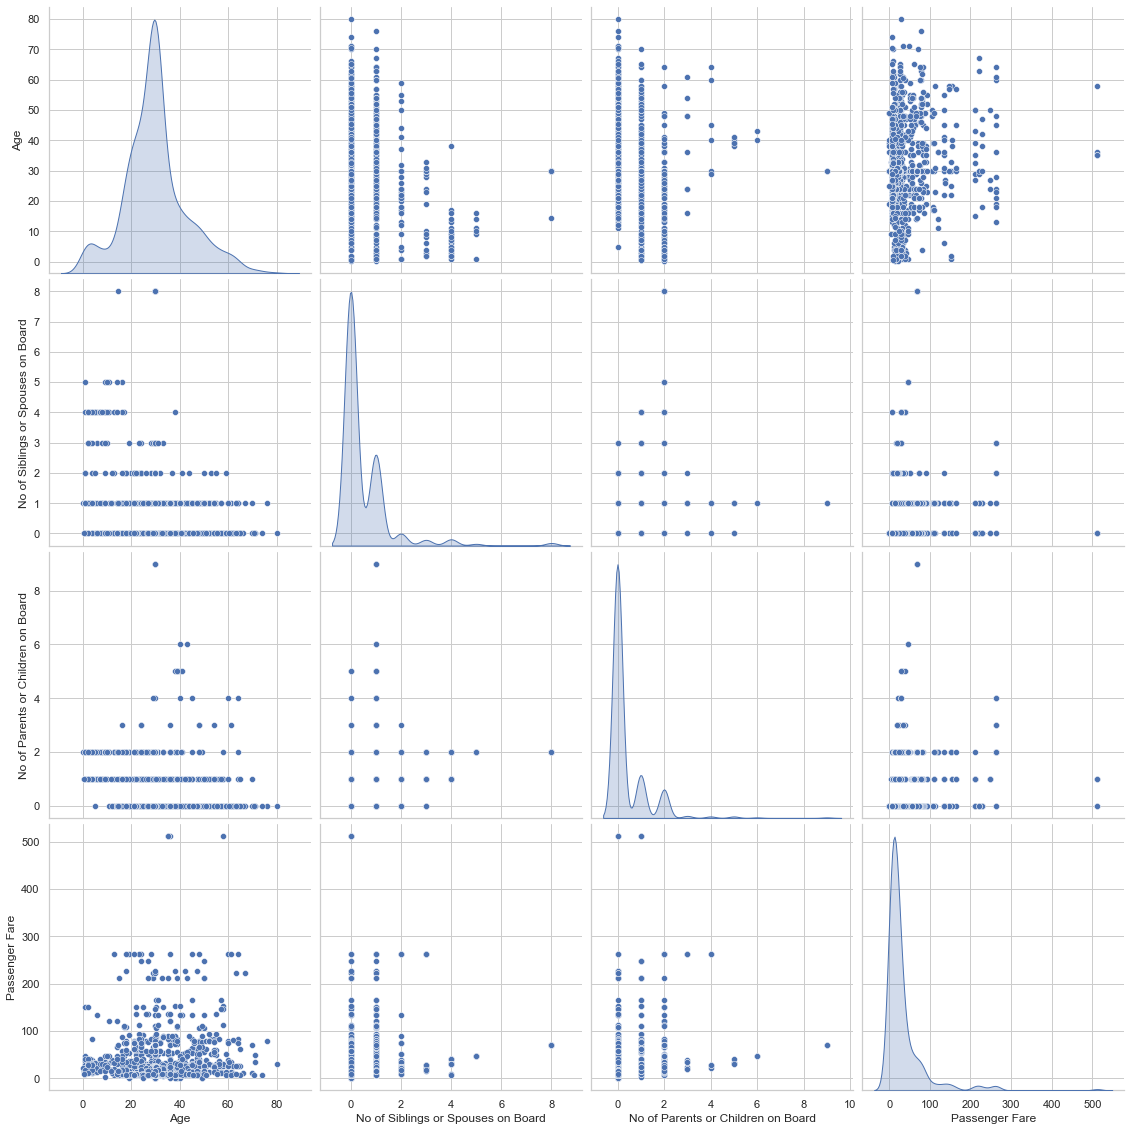

In [40]:
# Acompañamos nuestro análisis de las variables cuantitativas, representamos gráficamente su distribución 
# de probabilidad (curva de densidad) y cruzamos los valores de dichas variables entre sí (gráfico de dispersión), 
#todo ello integrado en una misma matriz con la función pairplot de la librería seaborn. 
# La dispersión de los valores resultantes del cruce de variables refuerza visualmente lo que ya señalaban
# los coeficientes de la matriz de correlación, a saber: la ausencia de dependencias lineales fuertes.
sns.set(style='whitegrid', color_codes=True)
quantitative_plots = sns.pairplot(df[quantitative_cols], size=4, kind='scatter', diag_kind='kde')
# Nótese la diferencia con la misma función integrada con la librería pandas:
# pd.plotting.scatter_matrix(quantitative_fields, figsize = (12, 12), diagonal='kde')

In [41]:
# En relación a la distribución probabilística de las variables por separado, 
# definimos una función para ver en más detalle las mismas y, al mismo tiempo, 
# acompañar la curva de densidad con un histograma junto a un diagrama de caja y bigotes
# con fin de obtener un soporte a la hora de dar cuenta de la presencia de valores atípicos. 
def quantitative_probability_distribution(df, column):
    # Dividimos el marco en dos partes.
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})
    # Añadimos un gráfico a cada una de las partes.
    sns.boxplot(df[column], ax=ax_box)
    sns.distplot(df[column], ax=ax_hist)

C:\Users\monts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\monts\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\monts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

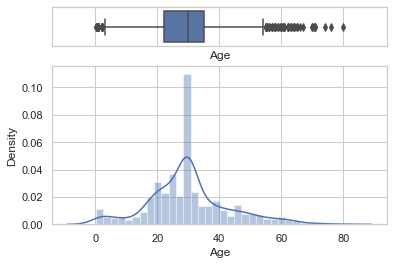

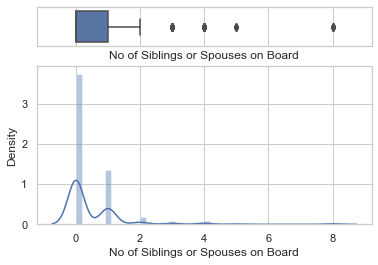

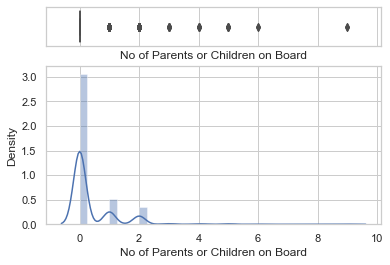

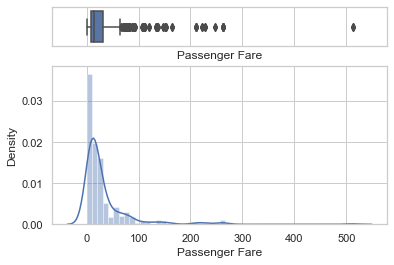

In [42]:
for col in quantitative_cols:
    quantitative_probability_distribution(df, col)

[**EX13**] Graficar una distribución de las columnas categóricas  
Tip: https://seaborn.pydata.org/tutorial/categorical.html y https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot     

In [87]:
# Una vez hemos realizado el análisis de las variables numéricas, pasamos a explorar 
# las variables categóricas. Para ello, definimos la función qualitative_probability_distribution 
# que espera recibir como argumentos el dataframe y el nombre de la columna que queremos representar. 
# El cuerpo de la función consiste sencillamente en el despliegue de un gráfico de barras que muestre 
# el conteo del número de ocurrencias para cada uno de los valores de la variable y un diagrama de caja
# y bigotes para la distribución de los valores de la variable dependiente “Survived” con respecto
# a los diferentes valores de la columna en cuestión.

def qualitative_probability_distribution(df, column):
    # Dividimos el marco en dos partes.
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Añadimos un gráfico a cada una de las partes.
    sns.countplot(x=column, data=df, ax=axs[0])
    sns.barplot(x = col, y = 'target', data = df, ax=axs[1])

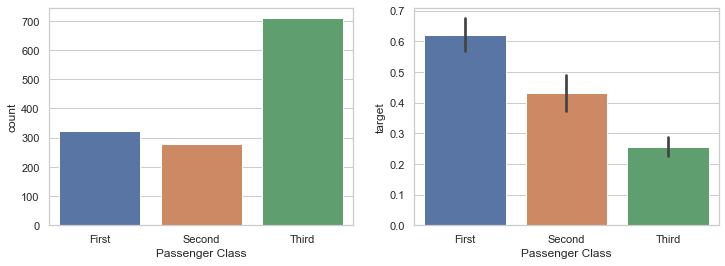

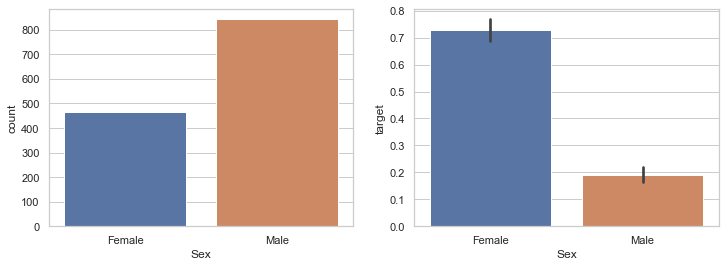

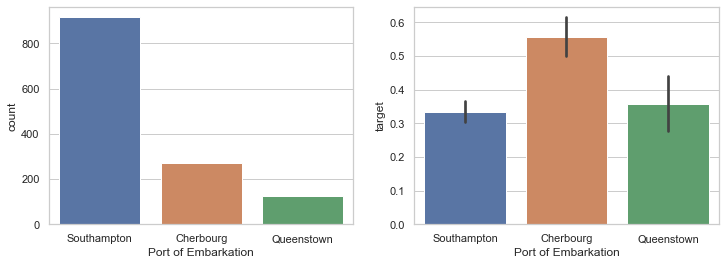

In [88]:
qualitative_cols = ["Passenger Class", "Sex", "Port of Embarkation"]
for col in qualitative_cols:
    qualitative_probability_distribution(df, col)

[**EX14**] Convertir las variables categóricas a dummies y eliminar las innecesarias

In [90]:
# Realizamos una conversión de las variables categóricas a dummies numéricas.
for category in qualitative_cols:
    cat_dummies = pd.get_dummies(df[category], prefix=category)
    df = df.join(cat_dummies)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Sex                                 1309 non-null   object 
 2   Age                                 1309 non-null   float64
 3   No of Siblings or Spouses on Board  1309 non-null   int64  
 4   No of Parents or Children on Board  1309 non-null   int64  
 5   Passenger Fare                      1309 non-null   float64
 6   Port of Embarkation                 1309 non-null   object 
 7   Survived                            1309 non-null   object 
 8   target                              1309 non-null   float64
 9   Passenger Class_First               1309 non-null   uint8  
 10  Passenger Class_Second              1309 non-null   uint8  
 11  Passenger Class_Third               1309 no

In [93]:
# Eliminamos las columnas categóricas originales porque ya no las vamos a necesitar.
# Para ello usamos una lista por compresión para definir el subconjunto de columnas que vamos a querer:
df_cols = df.columns.values.tolist()
keep_cols = [col for col in df_cols if col not in qualitative_cols]
df = df[keep_cols]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1309 non-null   float64
 1   No of Siblings or Spouses on Board  1309 non-null   int64  
 2   No of Parents or Children on Board  1309 non-null   int64  
 3   Passenger Fare                      1309 non-null   float64
 4   Survived                            1309 non-null   object 
 5   target                              1309 non-null   float64
 6   Passenger Class_First               1309 non-null   uint8  
 7   Passenger Class_Second              1309 non-null   uint8  
 8   Passenger Class_Third               1309 non-null   uint8  
 9   Sex_Female                          1309 non-null   uint8  
 10  Sex_Male                            1309 non-null   uint8  
 11  Port of Embarkation_Cherbourg       1309 no

In [129]:
# Eliminamos Survived, que es lo mismo que target
target_categorical = df.pop('Survived')

In [101]:
df

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,target,Passenger Class_First,Passenger Class_Second,Passenger Class_Third,Sex_Female,Sex_Male,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
0,29.000000,0,0,211.3,1.0,1,0,0,1,0,0,0,1
1,0.900000,1,2,151.6,1.0,1,0,0,0,1,0,0,1
2,2.000000,1,2,151.6,0.0,1,0,0,1,0,0,0,1
3,30.000000,1,2,151.6,0.0,1,0,0,0,1,0,0,1
4,25.000000,1,2,151.6,0.0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,14.500000,1,0,14.5,0.0,0,0,1,1,0,1,0,0
1305,29.881166,1,0,14.5,0.0,0,0,1,1,0,1,0,0
1306,26.500000,0,0,7.2,0.0,0,0,1,0,1,1,0,0
1307,27.000000,0,0,7.2,0.0,0,0,1,0,1,1,0,0


[**Recomendable**] Guardar los datos ya limpios

In [99]:
with open(PATH+'titanic_cleaned.pkl', 'wb') as f:
    pickle.dump(df, f)

In [130]:
with open(PATH+'titanic_cleaned.pkl', 'rb') as f:
    df_cleaned = pickle.load(f)
df = df_cleaned

## 6.- Datos entrenamiento y testeo
Dividir los datos

[**EX15**] Extraer la variable objetivo

In [131]:
# Extraemos la variable dependiente de las variables predictoras:
target = df.pop("target")

[**EX16**] Splitar los datos en train y test

In [132]:
# Una vez tenemos los datos preparados, dividimos los registros del dataframe en dos subconjuntos 
# (entrenamiento [75%] y test [25%]). Asimismo, dividimos cada subconjunto a su vez en dos conjuntos 
# de columnas, separamos las variables predictoras de la variable objetivo. Para llevar a cabo todas 
# estas divisiones hacemos uso de la función train_test_split procedente del paquete sklearn.model_selection.
X_train, X_test, y_train, y_test = train_test_split(df, target)

[**EX17**] Normalizar los datos

In [133]:
# Escalamos los datos de las variables independientes:
modelo_normalizacion = StandardScaler().fit(X_train)
features = modelo_normalizacion.transform(X_train)
features

array([[ 1.6327711 , -0.47239368,  0.70819715, ...,  2.00767757,
        -0.32935479, -1.5398487 ],
       [ 0.86478761, -0.47239368,  5.34753876, ..., -0.49808795,
        -0.32935479,  0.64941445],
       [-0.05679258, -0.47239368, -0.45163825, ..., -0.49808795,
        -0.32935479,  0.64941445],
       ...,
       [ 0.25040081, -0.47239368, -0.45163825, ..., -0.49808795,
        -0.32935479,  0.64941445],
       [-1.89995297, -0.47239368, -0.45163825, ..., -0.49808795,
        -0.32935479,  0.64941445],
       [-0.67117938, -0.47239368, -0.45163825, ..., -0.49808795,
        -0.32935479,  0.64941445]])

In [109]:
#Para ver como ha realizado la normalización....
df_features = pd.DataFrame(features,columns=df.columns)
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,981.0,1.020817e-16,1.00051,-2.326855,-0.612309,0.007535,0.410126,3.949325
No of Siblings or Spouses on Board,981.0,-8.442675e-17,1.00051,-0.484871,-0.484871,-0.484871,0.451465,7.005814
No of Parents or Children on Board,981.0,-2.437737e-16,1.00051,-0.454142,-0.454142,-0.454142,-0.454142,10.471249
Passenger Fare,981.0,1.595733e-16,1.00051,-0.671305,-0.508991,-0.373386,-0.040538,9.854506
Passenger Class_First,981.0,7.220411e-17,1.00051,-0.564401,-0.564401,-0.564401,-0.564401,1.771790
Passenger Class_Second,981.0,-2.204602e-16,1.00051,-0.515564,-0.515564,-0.515564,-0.515564,1.939623
Passenger Class_Third,981.0,-1.131726e-17,1.00051,-1.102019,-1.102019,0.907425,0.907425,0.907425
Sex_Female,981.0,1.824342e-16,1.00051,-0.731581,-0.731581,-0.731581,1.366902,1.366902
Sex_Male,981.0,-1.824342e-16,1.00051,-1.366902,-1.366902,0.731581,0.731581,0.731581
Port of Embarkation_Cherbourg,981.0,5.522822e-17,1.00051,-0.509222,-0.509222,-0.509222,-0.509222,1.963781


In [26]:
'''
La multicolinealidad es un problema habitual en el conjunto de características independientes que afecta negativamente
a los modelos, sobre todo en las regresiones lineales múltiples. 
Esta se produce cuando existen asociaciones lineales en el conjunto de variables predictoras; esto es, 
cuando dos o más variables de entrada tienen una correlación alta y, por lo tanto, son dependientes. 
Para evitar dicho problema, cuantificamos la intensidad de la multicolinealidad 
con el factor de inflación de la varianza (VIF) y excluimos aquellas variables cuyo factor sea demasiado 
elevado (situado por encima de 5). 
Existe un amplio debate acerca de qué valor VIF determina que podamos considerar que una variable debe ser omitida. 
Por lo general, aquellas posturas más conservadoras sitúan el umbral en 5 mientras que las que toman un riesgo mayor 
tienden a colocarlo en 10. 
'''
'''
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    model = LinearRegression()
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    for i in range(num_features):
        x_features = features[:]
        y_feature = features[i]
        x_features.remove(y_feature)
        x = data[x_features]
        y = data[y_feature]
        model.fit(data[x_features], data[y_feature])
        result[y_feature] = 1/(1 - model.score(data[x_features], data[y_feature]))
    return(result)

def selectDataUsingVIF(data, max_VIF=5):
    result = data.copy(deep = True)
    VIF = calculateVIF(result)
    while VIF.to_numpy().max() > max_VIF:
        col_max = np.where(VIF == VIF.to_numpy().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        VIF = calculateVIF(result)
    return(result)

features = selectDataUsingVIF(df)
calculateVIF(features)
'''

"\ndef calculateVIF(data):\n    features = list(data.columns)\n    num_features = len(features)\n    model = LinearRegression()\n    result = pd.DataFrame(index = ['VIF'], columns = features)\n    result = result.fillna(0)\n    for i in range(num_features):\n        x_features = features[:]\n        y_feature = features[i]\n        x_features.remove(y_feature)\n        x = data[x_features]\n        y = data[y_feature]\n        model.fit(data[x_features], data[y_feature])\n        result[y_feature] = 1/(1 - model.score(data[x_features], data[y_feature]))\n    return(result)\n\ndef selectDataUsingVIF(data, max_VIF=5):\n    result = data.copy(deep = True)\n    VIF = calculateVIF(result)\n    while VIF.to_numpy().max() > max_VIF:\n        col_max = np.where(VIF == VIF.to_numpy().max())[1][0]\n        features = list(result.columns)\n        features.remove(features[col_max])\n        result = result[features]\n        VIF = calculateVIF(result)\n    return(result)\n\nfeatures = selectDataU

## 7.- Entrenar el modelo
Entrenar el modelo usando una regresión logística

[**EX18**] Usa una regresión logística

In [134]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\monts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
lr.score(X_train, y_train)

0.7869520897043832

## 8.- Evaluación
Evaluar el modelo

[**EX19**] Normaliza X_test

In [136]:
X_test_norm = modelo_normalizacion.transform(X_test)

[**EX20**] Aplica el modelo de regr. logística

In [137]:
predictions = lr.predict(X_test_norm)
predictions

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [138]:
# Obtenemos las probabilidades que predice el modelo y a partir de las cuales el modelo clasifica.
# En la primera columna vemos la probabilidad (Cómo de seguro está?) y, en la segunda, observamos la 
# probabilidad del valor de salida: ha sobrevivido o no. En base al umbral de 0,5.
probability = lr.predict_proba(X_test)
probability

array([[0.89593915, 0.10406085],
       [0.74821119, 0.25178881],
       [0.95406414, 0.04593586],
       [0.82934169, 0.17065831],
       [0.77956665, 0.22043335],
       [0.05233093, 0.94766907],
       [0.75506633, 0.24493367],
       [0.84714241, 0.15285759],
       [0.07694249, 0.92305751],
       [0.09402601, 0.90597399],
       [0.79328356, 0.20671644],
       [0.30295159, 0.69704841],
       [0.1377527 , 0.8622473 ],
       [0.72667991, 0.27332009],
       [0.89604047, 0.10395953],
       [0.22285575, 0.77714425],
       [0.87747201, 0.12252799],
       [0.60913569, 0.39086431],
       [0.86694415, 0.13305585],
       [0.92413181, 0.07586819],
       [0.19203702, 0.80796298],
       [0.10680843, 0.89319157],
       [0.79458651, 0.20541349],
       [0.32709375, 0.67290625],
       [0.77746762, 0.22253238],
       [0.45276077, 0.54723923],
       [0.88662938, 0.11337062],
       [0.88659295, 0.11340705],
       [0.2552236 , 0.7447764 ],
       [0.20545636, 0.79454364],
       [0.

[**EX21**] Medidas de AUC, Accuracy y Matriz de Confusion

In [139]:
# ROC - AUC
metrics.roc_auc_score(y_test, predictions)

0.7774944756076833

In [140]:
# Accuracy
metrics.accuracy_score(y_test, predictions)

0.7621951219512195

In [141]:
# Precision
metrics.precision_score(y_test, predictions)

0.5958904109589042

In [142]:
# Recall
metrics.recall_score(y_test, predictions)

0.8207547169811321

In [143]:
# Fscore
metrics.f1_score(y_test, predictions)

0.6904761904761905

In [144]:
print('\033[1m' + 'Accuracy for Decision Tree','\033[0m', '\n')

print ('Accuracy: ', metrics.accuracy_score(y_test, predictions) )

print(metrics.classification_report(y_test, predictions,target_names=target_categorical.unique()))

Accuracy for Decision Tree  

Accuracy:  0.7621951219512195
              precision    recall  f1-score   support

         Yes       0.90      0.73      0.81       222
          No       0.60      0.82      0.69       106

    accuracy                           0.76       328
   macro avg       0.75      0.78      0.75       328
weighted avg       0.80      0.76      0.77       328



Confusion Matrix for Logistic Regression  



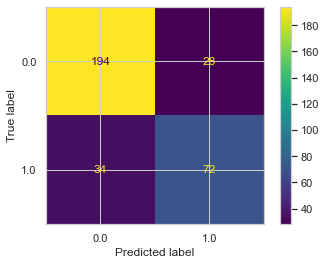

In [149]:
print('\033[1m' + 'Confusion Matrix for Logistic Regression','\033[0m', '\n')

# The next plot is more beatiful than the commented one
#cm_lr = metrics.confusion_matrix(y_test, predictions)
#print(cm_lr)

metrics.plot_confusion_matrix(lr, X_test, y_test)

## 9.- Mejoras

#### Para mejorar el modelo con una mejor selección de variables

In [37]:
# Fijamos el número final de variables que vamos a emplear para el modelo logístico.
n_features = 5
lr = LogisticRegression()
# Utilizamos el método RFE para elegir el número de variables que hemos seleccionado.
rfe = RFE(lr, n_features_to_select=n_features)
rfe = rfe.fit(X_train, y_train)

In [38]:
# Ranking de las variables que podríamos seleccionar como definitivas:
ranking = zip(df.columns, rfe.support_, rfe.ranking_)
list(ranking)
# Vemos con True las variables que han salido seleccionadas para nuestro modelo:
# "Age", "Passenger Class_First", "Passenger Class_Third", "Sex_Female", "Sex_Male"

[('Age', True, 1),
 ('No of Siblings or Spouses on Board', False, 2),
 ('No of Parents or Children on Board', False, 6),
 ('Passenger Fare', False, 7),
 ('Passenger Class_First', True, 1),
 ('Passenger Class_Second', False, 5),
 ('Passenger Class_Third', True, 1),
 ('Sex_Female', True, 1),
 ('Sex_Male', True, 1),
 ('Port of Embarkation_Cherbourg', False, 3),
 ('Port of Embarkation_Queenstown', False, 8),
 ('Port of Embarkation_Southampton', False, 4)]